In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('mnist_train.csv')

In [3]:
train_data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
test_data=pd.read_csv('mnist_test.csv')

In [6]:
train_data.shape

(60000, 785)

In [7]:
test_data.shape

(10000, 785)

In [8]:
train_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [9]:
test_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

As we see there is no null value in dataset in both Train and Test data

In [10]:
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [11]:
test_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


# Check the name of columns

In [12]:
print(train_data.columns)
print(test_data.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


# This are the values in lable columns we have to predict from the pixel values

In [13]:
np.sort(train_data['label'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

# Let's see the count of each value

<Axes: xlabel='label', ylabel='count'>

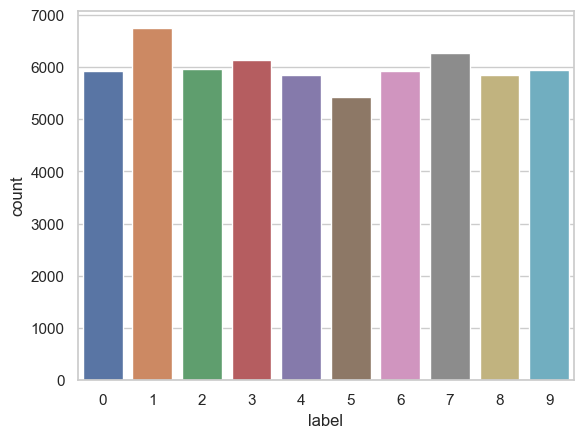

In [14]:
sns.set(style="whitegrid")
sns.countplot(x='label',data=train_data)

In [15]:
train_data.label.astype('category').value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

# Let's see at what index "2" number is present so we can print using index number.

In [35]:
# n=list(train_data['label'].loc[lambda x: x==2].index)
# print(n)    

Text(0.5, 1.0, 'Digit 2')

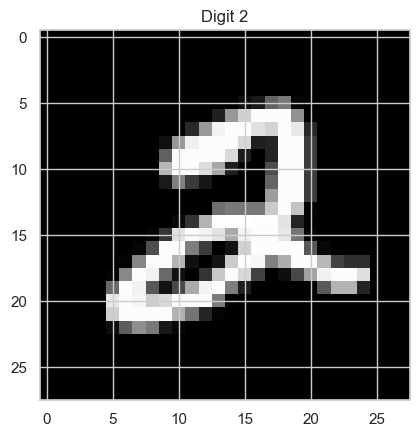

In [17]:

four = train_data.iloc[n[0], 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 2")

# Now we select randomly any number of index to print the iamge of number.

Text(0.5, 1.0, 'Number')

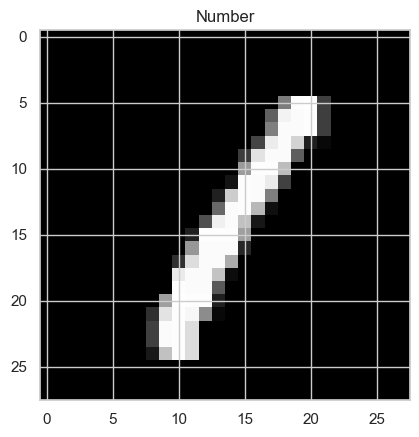

In [18]:
number=train_data.iloc[3,1:]
number.shape
number=number.values.reshape(28,28)
plt.imshow(number,cmap='gray')
plt.title('Number')

# Seperate the data in "independent" and "dependent" variable to create a model

In [19]:
X=train_data.drop(columns='label')
Y=train_data['label']

In [20]:
Y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [21]:
X.shape

(60000, 784)

In [22]:
Y.shape

(60000,)

# Scale()
The scale() function is an inbuilt function in the Python Wand ImageMagick library which is used to change the image size by scaling each pixel value by given columns and rows.

In [23]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# Split the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=10)

# Create a Model
In SVM there is two type
1. Linear SVM
2. Non_linear SVM

In [25]:
# Linear-SVM
from sklearn.svm import SVC

In [26]:
model_linear = SVC(kernel='linear')

In [27]:
model_linear.fit(X_train, Y_train)

SVC(kernel='linear')

In [28]:
# predict
Y_pred = model_linear.predict(X_test)

In [29]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# accuracy

print("accuracy:", metrics.accuracy_score(Y_test, Y_pred), "\n")

# cm

print(metrics.confusion_matrix(Y_test,Y_pred))

accuracy: 0.9173333333333333 

[[1704    0   15    6    3   20   14    1    6    3]
 [   1 1952   10    5    2    3    0    2   15    2]
 [  12   33 1655   36   22    9   21   15   25    3]
 [   9    6   46 1643    5   67    1   11   37    9]
 [   6    9   23    1 1651    5   10    8    6   53]
 [  19    6   12   70   12 1453   22    2   40   16]
 [  18    5   21    1   15   19 1673    0    5    0]
 [   7   12   26    9   35    6    2 1789    6   72]
 [  21   30   48   67    7   41   16    7 1477   10]
 [   5    2   14   16   66    9    2   50   23 1515]]


# Non-linear SVM

In [30]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, Y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [31]:
# accuracy

print("accuracy:", metrics.accuracy_score(Y_test, y_pred), "\n")

# cm

print(metrics.confusion_matrix(Y_test,y_pred))

accuracy: 0.962 

[[1736    0    6    2    0    4   11    6    6    1]
 [   1 1957   13    5    2    0    1    8    4    1]
 [   6    3 1776   10    7    3    5   16    4    1]
 [   1    0   31 1733    3   21    2   19   19    5]
 [   1    4   16    1 1696    3    9    3    7   32]
 [   5    3    8   26    3 1562   15   18    9    3]
 [   7    3    7    0    3   11 1715    6    5    0]
 [   2    7   16    5   16    0    0 1888    2   28]
 [   4   13   17   11    4   12   11    8 1637    7]
 [   1    2    8   11   19    4    0   32    9 1616]]
